In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
import pandas as pd
from sklearn import metrics

In [2]:
# 讀取資料
df=pd.read_csv('./SANN_3.csv')
df.drop(df[df['Sample'] == "Train"].index, inplace = True)
df['Diagnosis'] = df['Diagnosis'].replace(['Controls+Borderline'], 0)
df['Diagnosis'] = df['Diagnosis'].replace(['Cancer'], 1)
df['Output'] = df['Output'].replace(['Controls+Borderline'], 0)
df['Output'] = df['Output'].replace(['Cancer'], 1)

In [3]:
# 在各種『決策門檻』（decision threshold）下，計算 『真陽率』（True Positive Rate；TPR）與『假陽率』（False Positive Rate；FPR）
fpr, tpr,threshold = roc_curve(df['Diagnosis'], df['Output'])
print(fpr, tpr, threshold)

[0.    0.125 1.   ] [0.         0.96428571 1.        ] [2 1 0]


In [4]:
auc1 = auc(fpr, tpr)
print(auc1)

0.9196428571428571


In [5]:
P= df[df['Diagnosis']==1].shape[0]
N= df[df['Diagnosis']==0].shape[0]
print(P,N)
y_unit=1/P
X_unit=1/N

# 以第一欄降冪排序，從大排到小。
df3=df.sort_values(by='Output', ascending=False)

# 依序掃描第二欄，計算每一座標點
# 若是1，Y加一單位，反之，若是0，X加一單位
X=[]
y=[]
current_X=0
current_y=0
for row in df3.itertuples():
    # row[0] is index
    #print(row[2])
    if row[2] == 1:
        current_y+=y_unit
    else:
        current_X+=X_unit
    X.append(current_X)
    y.append(current_y)

X1=np.array(X)        
y1=np.array(y)    
#print(X1, y1)

28 16


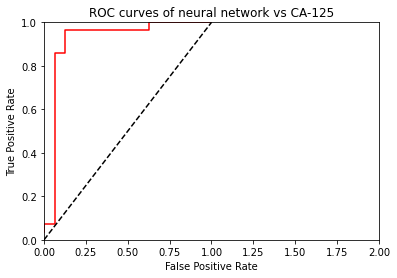

In [6]:
# 繪圖。   
plt.title('ROC curves of neural network vs CA-125')
plt.plot(X1, y1, color = 'red', label = 'AUC = %0.2f' % auc1)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 2])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()   

In [7]:
# 讀取資料
df2=pd.read_csv('./CA125.csv')
df2['Diagnosis'] = df2['Diagnosis'].replace(['Controls+Borderline'], 0)
df2['Diagnosis'] = df2['Diagnosis'].replace(['Cancer'], 1)
df2['Output'] = df2['Output'].replace(['Control or Borderline'], 0)
df2['Output'] = df2['Output'].replace(['Cancer'], 1)


In [8]:
# 在各種『決策門檻』（decision threshold）下，計算 『真陽率』（True Positive Rate；TPR）與『假陽率』（False Positive Rate；FPR）
fpr2, tpr2,threshold2 = roc_curve(df2['Diagnosis'], df2['Output'])
print(fpr2, tpr2, threshold2)

[0.         0.54545455 1.        ] [0.         0.74226804 1.        ] [2 1 0]


In [9]:
auc2 = auc(fpr2, tpr2)
print(auc2)

0.598406747891284


In [10]:
P2= df2[df2['Output']==1].shape[0]
N2= df2[df2['Output']==0].shape[0]
print(P2,N2)
y_unit=1/84
X_unit=1/35

# 以第一欄降冪排序，從大排到小。
df2=df2.sort_values(by='Diagnosis', ascending=False)

# 依序掃描第二欄，計算每一座標點
# 若是1，Y加一單位，反之，若是0，X加一單位
X2=[]
y2=[]
current_X2=0
current_y2=0
for row in df2.itertuples():
    # row[0] is index
    #print(row[2])
    if row[2] == 1:
        current_y2+=y_unit
    else:
        current_X2+=X_unit
    X2.append(current_X2)
    y2.append(current_y2)

X2=np.array(X2)        
y2=np.array(y2) 
#print(X2, y2)


84 35


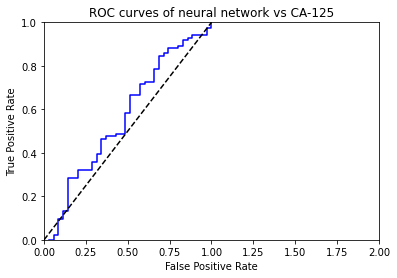

In [11]:
# 繪圖。   
plt.title('ROC curves of neural network vs CA-125')
plt.plot(X2, y2, color = 'blue', label = 'AUC = %0.2f' % auc2)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 2])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()   

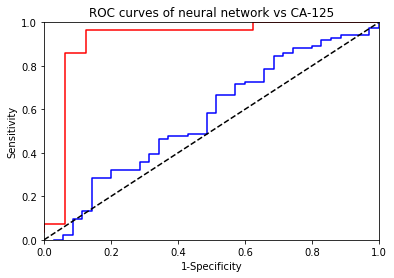

In [12]:
# 繪圖。   
plt.title('ROC curves of neural network vs CA-125')
plt.plot(X1, y1, color = 'red', label = 'AUC = %0.2f' % auc1)
plt.plot(X2, y2, color = 'blue', label = 'AUC = %0.2f' % auc2)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity')
plt.xlabel('1-Specificity')
plt.show()   

In [13]:
print(auc1, auc2)

0.9196428571428571 0.598406747891284
